<a href="https://colab.research.google.com/github/crismaque/Procesamiento_Digital-_de_Se-ales_PDS/blob/main/PDS_Consulta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Qué pasa en la forma matricial cuando se cambia el tamaño de la matriz, la entrada es una señal (vector)?

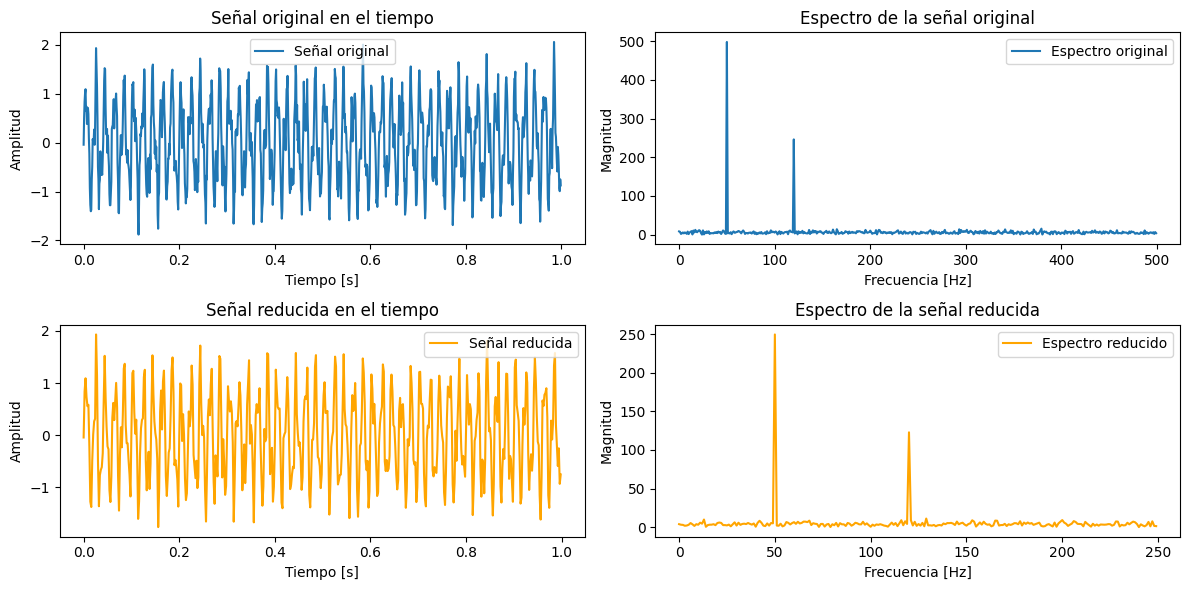

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000
T = 1
t = np.linspace(0, T, fs, endpoint=False)

f1, f2 = 50, 120
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.2 * np.random.randn(len(t))

freqs = np.fft.fftfreq(len(signal), 1/fs)
spectrum_original = np.fft.fft(signal)

factor_reduccion = 2
signal_reducida = signal[::factor_reduccion]

fs_reducida = fs / factor_reduccion
freqs_reducida = np.fft.fftfreq(len(signal_reducida), 1/fs_reducida)
spectrum_reducido = np.fft.fft(signal_reducida)

# Graficar
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Señal original en el tiempo
axs[0, 0].plot(t, signal, label="Señal original")
axs[0, 0].set_title("Señal original en el tiempo")
axs[0, 0].set_xlabel("Tiempo [s]")
axs[0, 0].set_ylabel("Amplitud")
axs[0, 0].legend()

# Espectro de la señal original
axs[0, 1].plot(freqs[:len(freqs)//2], np.abs(spectrum_original[:len(freqs)//2]), label="Espectro original")
axs[0, 1].set_title("Espectro de la señal original")
axs[0, 1].set_xlabel("Frecuencia [Hz]")
axs[0, 1].set_ylabel("Magnitud")
axs[0, 1].legend()

# Señal reducida en el tiempo
t_reducida = np.linspace(0, T, len(signal_reducida), endpoint=False)
axs[1, 0].plot(t_reducida, signal_reducida, label="Señal reducida", color='orange')
axs[1, 0].set_title("Señal reducida en el tiempo")
axs[1, 0].set_xlabel("Tiempo [s]")
axs[1, 0].set_ylabel("Amplitud")
axs[1, 0].legend()

# Espectro de la señal reducida
axs[1, 1].plot(freqs_reducida[:len(freqs_reducida)//2], np.abs(spectrum_reducido[:len(freqs_reducida)//2]), label="Espectro reducido", color='orange')
axs[1, 1].set_title("Espectro de la señal reducida")
axs[1, 1].set_xlabel("Frecuencia [Hz]")
axs[1, 1].set_ylabel("Magnitud")
axs[1, 1].legend()

plt.tight_layout()
plt.show()